In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
dP_dx = -8
rho = 1
mu = 1
h = 1
delta_t = 0.001
delta_y = 0.01
points_y = int(h / delta_y) + 1


_lambda = (mu * delta_t) / (delta_y**2)
u = np.zeros(points_y)
# Create Left Hand Side Matrix in the sparse matrix method
A = np.zeros((points_y, points_y))
for i in range(1, points_y-1):
    A[i, i - 1] = -_lambda / 2
    A[i, i] = 1 + _lambda
    A[i, i + 1] = -_lambda / 2
A[0, 0] = 1
A[-1,-1] = 1

# Create First Right Hand Side Matrix in the sparse matrix method
B_1 = np.zeros((points_y, 1))
for i in range(1, points_y-1):
    B_1[i,0] = -delta_t / rho * dP_dx

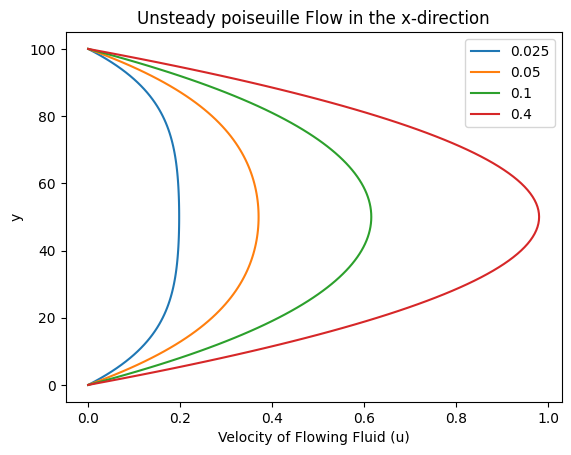

(None, None)

In [7]:

# Create second Right Hand Side Matrix in the sparse matrix method
B_2 = np.zeros((points_y, 1))
for i in range(1, points_y-2):
    B_2[i] = _lambda / 2 * u[i - 1] + (1 - _lambda) * u[i] + _lambda / 2 * u[i + 1]

# Create automatic controls for when the lines have to be plotted
upper_limit_time = []
times_list = [0.025, 0.05, 0.1, 0.4]
for i in times_list:
    upper_limit_time.append(int(i/delta_t))
    
# Calculate u_n trough sparse matrix method
list_of_u_n = []
for x in range(1, int(0.4/delta_t) + 1):
    # sum B to u_n
    RHS_sum = B_1 + B_2

    # Matrix multiplication between A and RHS_sum
    u_n = np.linalg.solve(A, RHS_sum).reshape(points_y)

    # Recreate second Right Hand Side Matrix in the sparse matrix method
    for i in range(1, points_y - 1):
        B_2[i] = _lambda / 2 * u_n[i - 1] + (1 - _lambda) * u_n[i] + _lambda / 2 * u_n[i + 1]

    for t in upper_limit_time:
        if x == t:
            plt.plot(u_n, np.arange(0, points_y))
            list_of_u_n.append(u_n.tolist())

# change shape of a list
list_of_u_n = np.array(list_of_u_n)
list_of_u_n.reshape(points_y, 4)
list_of_u_n = list_of_u_n.tolist()

# Plot
plt.legend(times_list), plt.xlabel('Velocity of Flowing Fluid (u)'), plt.ylabel('y'), plt.title('Unsteady poiseuille Flow in the x-direction')
plt.savefig('Matrix attempt.png'), plt.show()


471


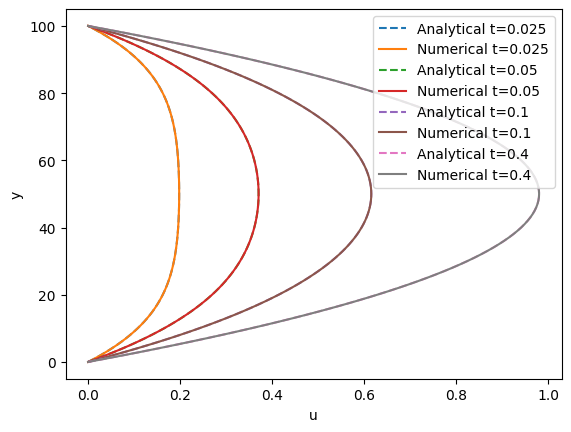

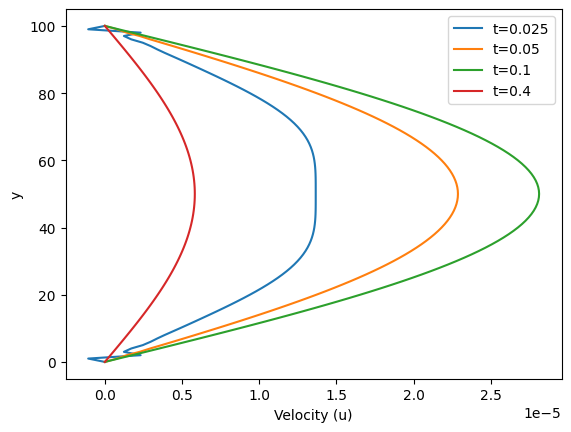

2.2878638801959728e-05


In [8]:

# Calculate B_n elements
B_n = lambda n: 8 * ((np.pi * n)*np.sin(np.pi*n) + 2 * np.cos(np.pi * n) - 2) / (np.pi ** 3 * n ** 3)

# Calculate when B_n < 1e-8
for n in range(1, 500):
    if n % 2 != 0:
        if abs(B_n(n))< 1e-8:
            n_max = n
            print(n_max)
            break

exponential_factor = lambda n, t: np.e**(-n**2*np.pi**2*mu*t/(h**2))

y_list = np.arange(0, 1.01, delta_y)
plot_values_list = []
for t in times_list:
    plot_values = []
    for y in y_list:
        summation_term_value = 0
        # Sum all over the B_n elements
        for n in range(1, n_max + 1):
            summation_term_value += B_n(n) * exponential_factor(n, t) * np.sin(n * np.pi * y / h)
        
        # Add steady state equation for every point in y
        plot_values_1 = 4 * y * (1 - y / h) + summation_term_value
        plot_values.append(plot_values_1)
        
    # Plot
    plot_values_list.append(plot_values)
    plt.plot(plot_values, np.arange(0, points_y), '--', label='Analytical t=' + str(t))
    plt.plot(list_of_u_n[times_list.index(t)], range(0, points_y), label='Numerical t=' + str(t))

plt.legend(), plt.title(''), plt.xlabel('u'), plt.ylabel('y'), plt.savefig('Numerical vs Analytical'), plt.show()

# Calculate difference between analytical solution and numerical solution
difference = [plot_values_list[i][j] - list_of_u_n[i][j] for i in range(0, len(list_of_u_n)) for j in range(0, len(list_of_u_n[i]))]

# Reshape difference to have 101 rows and 4 columns to plot it
difference = np.reshape(difference, (4, points_y))
for i in range(len(times_list)):
    plt.plot(difference[i], range(0, points_y), label='t=' + str(times_list[i]))

plt.legend(), plt.xlabel('Velocity (u)'), plt.ylabel('y'), plt.savefig('Error'), plt.show()
print(max(difference[1]))


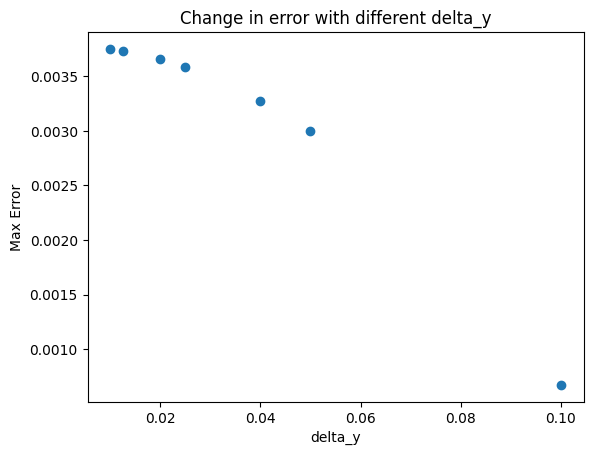

(<matplotlib.collections.PathCollection at 0x11c865390>,
 Text(0.5, 1.0, 'Change in error with different delta_y'),
 Text(0.5, 24.140625, 'delta_y'),
 Text(24.0, 0.5, 'Max Error'),
 None,
 None)

In [9]:
# delta_t = 0.001

# 0.0006751671539869664 with y=0.1
# 0.003749107090561088 with y=0.01
# 0.0037315620069092725 with y=0.0125
# 0.0036555434880394255 with y=0.02
# 0.0035853872503006645 with y=0.025
# 0.0010800921058358726 with t=0.03
# 0.0032750644385004524 with t=0.04
# 0.0030013049815976744 with t=0.05

error_max = [0.0006751671539869664, 0.0030013049815976744, 0.0032750644385004524, 0.0035853872503006645, 0.0036555434880394255, 0.0037315620069092725, 0.003749107090561088]
y_values = [0.1, 0.05, 0.04, 0.025, 0.02, 0.0125, 0.01]
plt.scatter(y_values, error_max), plt.title('Change in error with different delta_y'), plt.xlabel('delta_y'), plt.ylabel('Max Error'), plt.savefig('Error vs y'), plt.show()

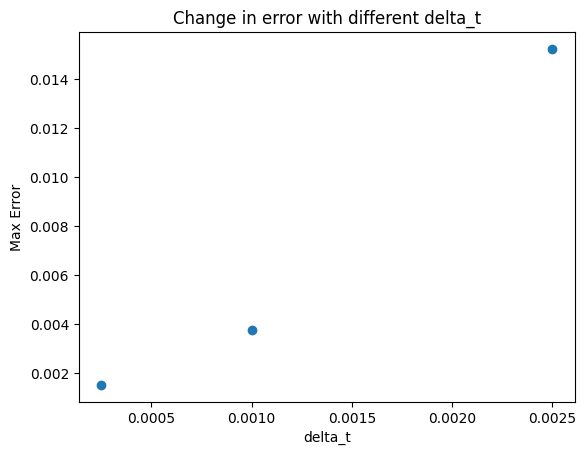

(<matplotlib.collections.PathCollection at 0x11c7f3d10>,
 Text(0.5, 1.0, 'Change in error with different delta_t'),
 Text(0.5, 24.140625, 'delta_t'),
 Text(24.0, 0.5, 'Max Error'),
 None,
 None)

In [10]:
# 0.015250637416536927 with t=0.0025
# 0.003749107090561088 with t=0.001
# 0.0015187162788161124 with t=0.00025

x_value = [0.0025, 0.001, 0.00025]
error_max = [0.015250637416536927, 0.003749107090561088, 0.0015187162788161124]
plt.scatter(x_value, error_max), plt.title('Change in error with different delta_t'), plt.xlabel('delta_t'), plt.ylabel('Max Error'), plt.savefig('Error vs t'), plt.show()


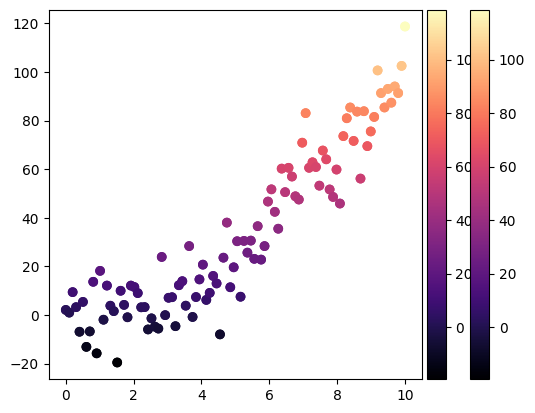

In [33]:
def colorbar(mappable):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    import matplotlib.pyplot as plt
    last_axes = plt.gca()
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(mappable, cax=cax)
    plt.sca(last_axes)
    return cbar

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, num=100)
y = x ** 2 + 10 * np.random.randn(100)
scatters = plt.scatter(x, y, c=y, cmap='magma')
colorbar(scatters)

scatters = plt.scatter(x, y, c=y, cmap='magma')
plt.colorbar()

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

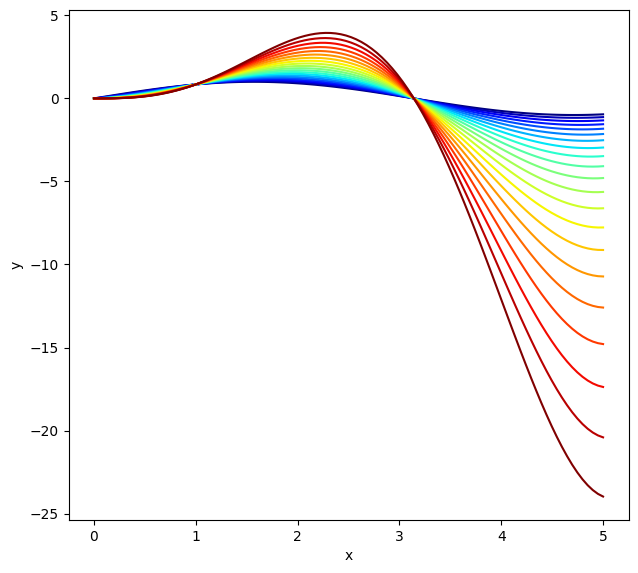

In [35]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

x = np.linspace(0, 5, 100)
N = 21
cmap = plt.get_cmap('jet',N)

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_axes([0.10,0.10,0.70,0.85])

for i,n in enumerate(np.linspace(0,2,N)):
    y = np.sin(x)*x**n
    ax1.plot(x,y,c=cmap(i))

plt.xlabel('x')
plt.ylabel('y')

norm = mpl.colors.Normalize(vmin=0,vmax=2)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ticks=np.linspace(0,2,N), boundaries=np.arange(-0.05,2.1,.1))

plt.show()